## **SOLO LO HICE PARA PCA**

Lo hice para PCA en R2 y en R3

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

In [2]:
from scripts.cargar_datos_cifar import clases_cifar

In [ ]:
resultados_path = '/home/heri/Documents/GitHub/Data-Mining/07-Reduccion-de-Dimensionalidad/02-Comparacion-de-Metodos/resultados/PCA'

In [4]:
cifar100_path = '/home/heri/Documents/GitHub/Data-Mining/07-Reduccion-de-Dimensionalidad/02-Comparacion-de-Metodos/datos/cifar-10-batches-py'

In [5]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [6]:
X, y, fine_label_names, idx_clases = clases_cifar(cifar100_path, clases)

# **PCA R2**

In [ ]:
# Pipeline: escalado + PCA
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Ajustar PCA y transformar
X_pca_2= pipeline_2.fit_transform(X)

# Guardar los resultados en un DataFrame
df_pca_2 = pd.DataFrame({
    'x_1': X_pca_2[:, 0],
    'x_2': X_pca_2[:, 1],
    'Clase': [fine_label_names[i] for i in y]
})

In [ ]:
# Ajustar PCA y transformar
X_pca_2= pipeline_2.fit_transform(X)

In [39]:
# Guardar los resultados en un DataFrame
df_pca_2 = pd.DataFrame({
    'x_1': X_pca_2[:, 0],
    'x_2': X_pca_2[:, 1],
    'Clase': [fine_label_names[i] for i in y]
})

In [41]:
sns.set_theme(style="whitegrid", context="notebook", palette="tab10")

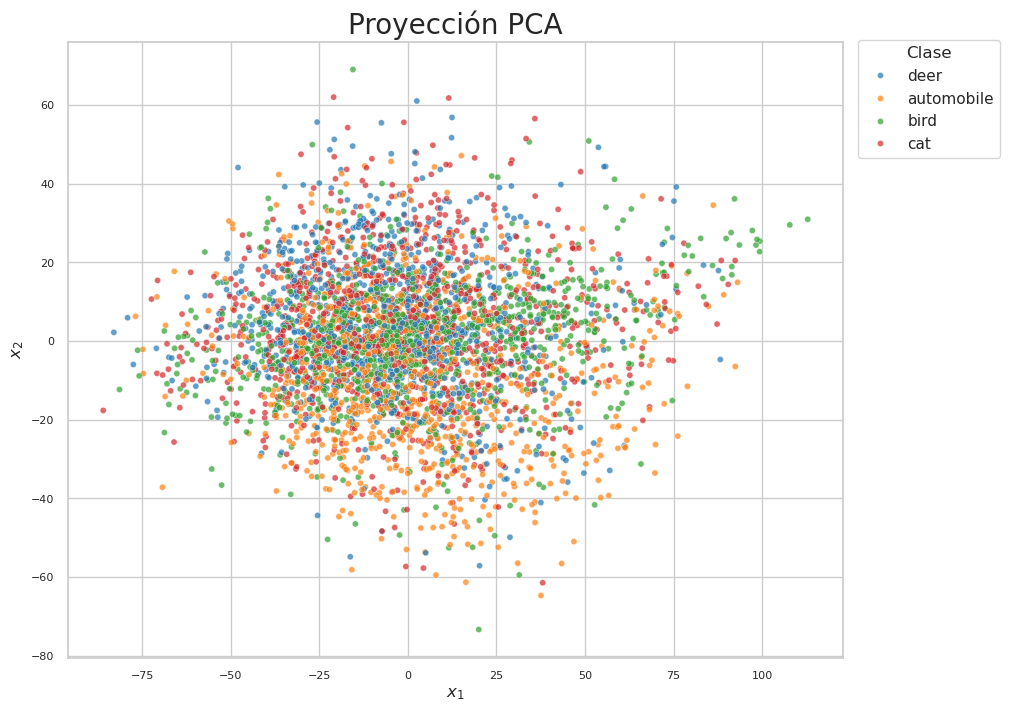

In [70]:
# Hacer un gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca_2, x='x_1', y='x_2', hue='Clase', alpha=0.7, s=20)
plt.title(r'Proyección PCA', fontsize=20) 
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Clase', bbox_to_anchor=(1.01, 1.015), loc='upper left')
plt.grid(True)
plt.show()

# **PCA R3**

In [55]:
# Pipeline: escalado + PCA
pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])

In [56]:
# Ajustar PCA y transformar
X_pca_3 = pipeline_3.fit_transform(X)

In [59]:
# Guardar los resultados en un DataFrame
df_pca_3 = pd.DataFrame({
    'x_1': X_pca_3[:, 0],
    'x_2': X_pca_3[:, 1],
    'x_3': X_pca_3[:, 2],
    'Clase': [fine_label_names[i] for i in y]
})

In [86]:
import matplotlib

fig = go.Figure()

for i, clase in enumerate(clases):
    mask = df_pca_3['Clase'] == clase
    fig.add_trace(go.Scatter3d(
        x=df_pca_3.loc[mask, 'x_1'],
        y=df_pca_3.loc[mask, 'x_2'],
        z=df_pca_3.loc[mask, 'x_3'],
        mode='markers',
        marker=dict(size=1.2, opacity=0.5),
        name=clase
    ))

fig.update_layout(
    title='Proyección PCA',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        xaxis=dict(backgroundcolor='rgba(22,22,22,0)'),
        yaxis=dict(backgroundcolor='rgba(0,0,0,0)'),
        zaxis=dict(backgroundcolor='rgba(0,0,0,0)')
    ),
    legend_title='Clase',
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.update_layout(scene_camera=dict(eye=dict(x=2, y=2, z=2)))
fig.update_layout(title_font=dict(size=20, color='black', family='Arial'))

fig.show()


In [14]:
pipeline_3.named_steps['pca'].explained_variance_ratio_

array([0.27541728, 0.10415322, 0.0630143 ])

In [15]:
pipeline_3.named_steps['pca'].components_

array([[ 0.02250392,  0.02278428,  0.02296208, ...,  0.01990117,
         0.02003476,  0.01995699],
       [-0.01800164, -0.01844916, -0.0190394 , ...,  0.01584852,
         0.01477623,  0.01377621],
       [-0.014504  , -0.01471306, -0.01439154, ..., -0.01821478,
        -0.01785134, -0.01713971]])